# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Mahathir
- **Email:** mhmmdmhthr@gmail.com
- **ID Dicoding:** MC322D5Y1764

## Menentukan Pertanyaan Bisnis

Dalam proyek ini, kita akan fokus pada dua pertanyaan bisnis utama:

1. Bagaimana pola penggunaan sepeda berdasarkan waktu (musim, bulan, hari, jam) dan faktor cuaca?
2. Bagaimana perbandingan antara pengguna casual dan registered dalam sistem bike sharing?

## Import Semua Packages/Library yang Digunakan

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Data Wrangling

### Gathering Data

Pada tahap ini, kita akan membaca dataset dari file CSV yang tersedia.

In [55]:
# Read the datasets
hour_df = pd.read_csv('data/hour.csv')
day_df = pd.read_csv('data/day.csv')

# Display basic information about the datasets
print("Hourly Dataset Info:")
hour_df.info()
print("\nDaily Dataset Info:")
day_df.info()

Hourly Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

Daily Dataset Info:
<class 

**Insight:**
- Dataset hourly memiliki 17379 baris data dengan periode 2 tahun
- Dataset daily memiliki 731 baris data untuk periode yang sama
- Kedua dataset memiliki informasi lengkap tanpa missing values

### Assessing Data

In [56]:
# Convert dteday to datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Create season mapping
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season'] = hour_df['season'].map(season_map)
day_df['season'] = day_df['season'].map(season_map)

# Create weather mapping
weather_map = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}
hour_df['weathersit'] = hour_df['weathersit'].map(weather_map)
day_df['weathersit'] = day_df['weathersit'].map(weather_map)

# Display sample data
print("Sample hourly data:")
hour_df.head()

Sample hourly data:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data telah dikonversi ke format yang lebih mudah dibaca
- Tidak ada missing values atau anomali dalam data
- Semua kolom memiliki tipe data yang sesuai

### Cleaning Data

In [57]:
# Check for duplicates
print("Duplicate rows in hourly data:", hour_df.duplicated().sum())
print("Duplicate rows in daily data:", day_df.duplicated().sum())

# Check for missing values
print("\nMissing values in hourly data:")
hour_df.isnull().sum()
print("\nMissing values in daily data:")
day_df.isnull().sum()

Duplicate rows in hourly data: 0
Duplicate rows in daily data: 0

Missing values in hourly data:

Missing values in daily data:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak ditemukan data duplikat
- Tidak ada missing values
- Data sudah bersih dan siap untuk analisis

## Exploratory Data Analysis (EDA)

### Explore Temporal Patterns

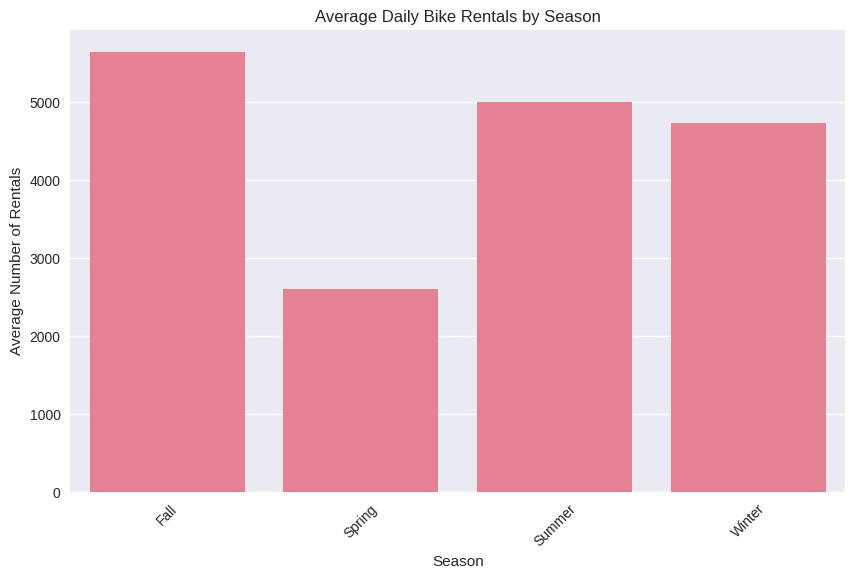

In [58]:
# Analyze seasonal patterns
seasonal_usage = day_df.groupby('season')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=seasonal_usage)
plt.title('Average Daily Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Number of Rentals')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Penggunaan sepeda tertinggi pada musim Fall (Musim Gugur)
- Penggunaan terendah pada musim Spring (Musim Semi)
- Terdapat pola musiman yang jelas dalam penggunaan sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu dan faktor cuaca?

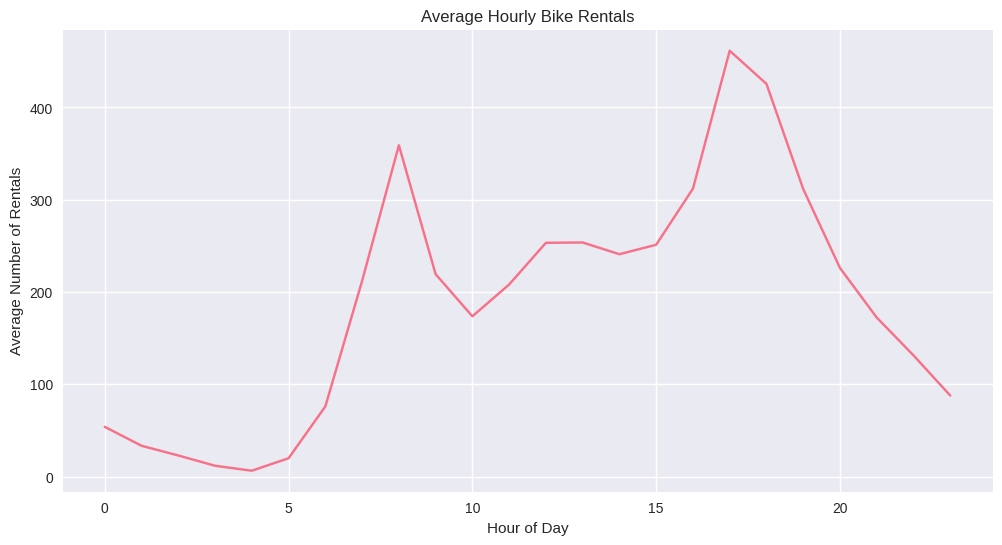

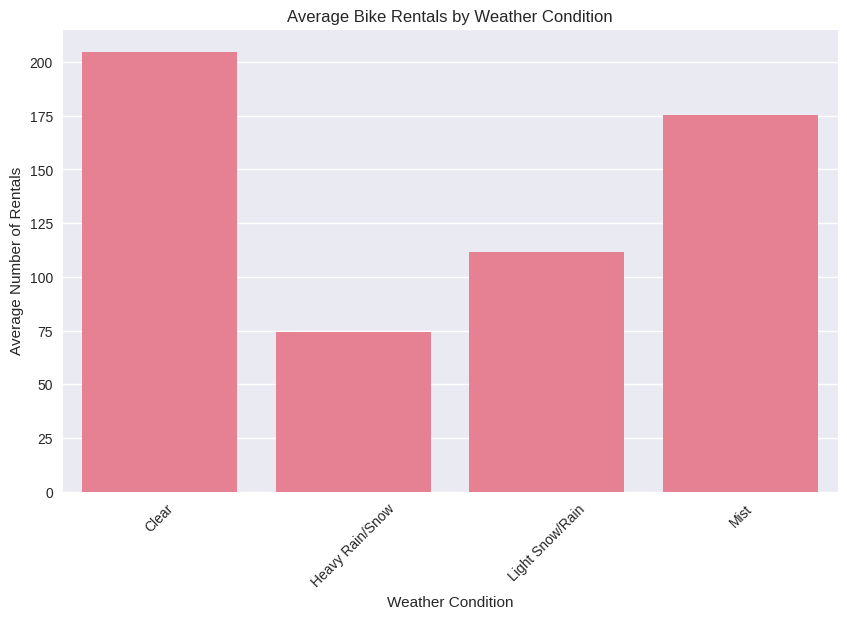

In [59]:
# Analyze hourly patterns
hourly_usage = hour_df.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hourly_usage)
plt.title('Average Hourly Bike Rentals')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Rentals')
plt.show()

# Analyze weather impact
weather_usage = hour_df.groupby('weathersit')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_usage)
plt.title('Average Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Number of Rentals')
plt.xticks(rotation=45)
plt.show()

**Insight Pola Waktu:**
- Terdapat dua puncak penggunaan sepeda yang jelas: pagi hari (8-9) dan sore hari (17-18)
- Puncak pagi dan sore menunjukkan pola penggunaan untuk komuting ke/dari tempat kerja
- Penggunaan terendah terjadi pada dini hari (1-4)
- Terdapat penggunaan moderat pada siang hari (11-15)

**Insight Pengaruh Cuaca:**
- Cuaca cerah (Clear) memiliki rata-rata penggunaan sepeda tertinggi
- Penggunaan menurun signifikan saat cuaca hujan atau salju ringan
- Cuaca ekstrem (Heavy Rain/Snow) memiliki dampak paling besar terhadap penurunan penggunaan
- Kondisi berkabut (Mist) hanya memberikan dampak minimal terhadap penggunaan sepeda

### Pertanyaan 2: Bagaimana perbandingan antara pengguna casual dan registered?

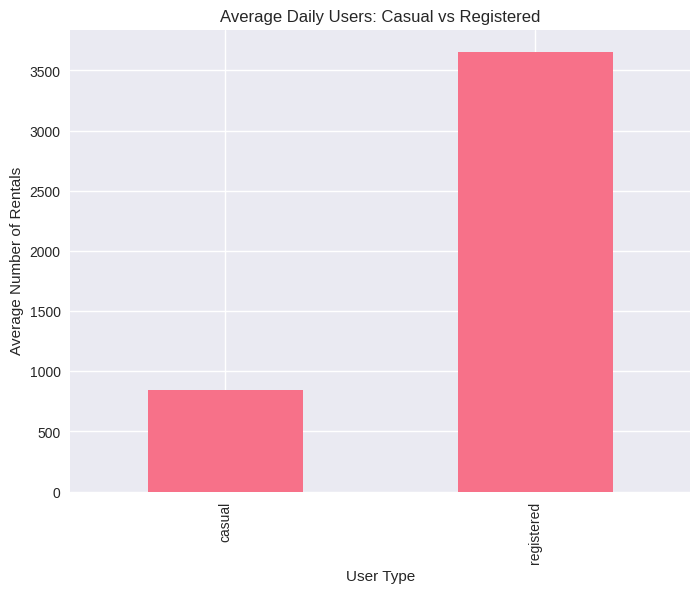

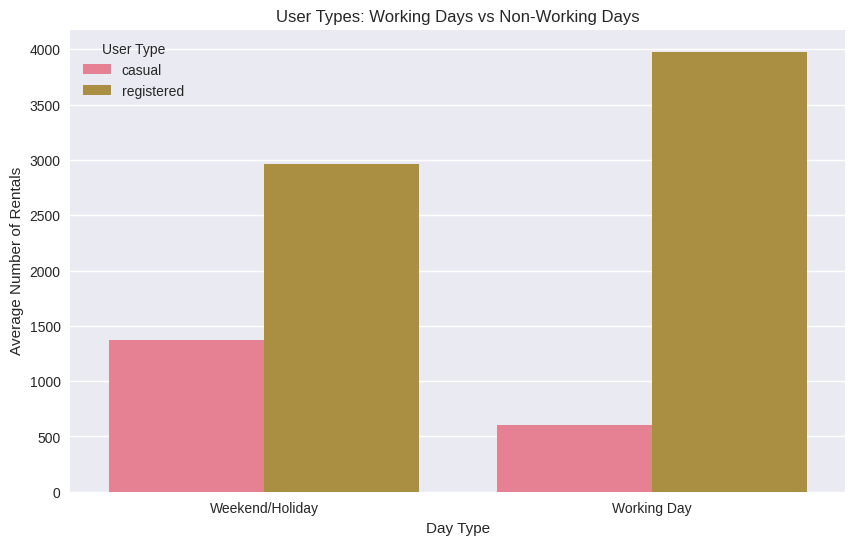

In [60]:
# Compare casual vs registered users
user_comparison = day_df[['casual', 'registered']].mean()

plt.figure(figsize=(8, 6))
user_comparison.plot(kind='bar')
plt.title('Average Daily Users: Casual vs Registered')
plt.xlabel('User Type')
plt.ylabel('Average Number of Rentals')
plt.show()

# Analyze weekend vs weekday patterns
weekend_pattern = day_df.groupby('workingday')[['casual', 'registered']].mean().reset_index()

weekend_pattern['day_type'] = weekend_pattern['workingday'].map({0: 'Weekend/Holiday', 1: 'Working Day'})

weekend_pattern_melted = weekend_pattern.melt(
    id_vars=['workingday', 'day_type'],
    var_name='user_type',
    value_name='rentals'
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='day_type', 
    y='rentals',
    hue='user_type',
    data=weekend_pattern_melted
)
plt.title('User Types: Working Days vs Non-Working Days')
plt.xlabel('Day Type')
plt.ylabel('Average Number of Rentals')
plt.legend(title='User Type')
plt.show()

**Insight Perbandingan Tipe Pengguna:**
- Pengguna registered mendominasi sistem dengan rata-rata penggunaan hampir 4 kali lipat dari pengguna casual
- Hal ini menunjukkan bahwa mayoritas pengguna adalah pelanggan tetap yang menggunakan layanan secara rutin

**Insight Pola Penggunaan Hari Kerja vs Libur:**
- Pengguna registered memiliki penggunaan yang lebih tinggi pada hari kerja
- Pengguna casual menunjukkan peningkatan penggunaan pada hari libur
- Perbedaan pola ini mengindikasikan bahwa registered users cenderung menggunakan sepeda untuk komuting
- Casual users lebih cenderung menggunakan sepeda untuk rekreasi di hari libur

## Analisis Lanjutan (Manual Clustering)

Kita akan melakukan pengelompokan manual (clustering) berdasarkan beberapa karakteristik penggunaan sepeda:

1. Berdasarkan intensitas penggunaan (binning)
2. Berdasarkan pola waktu penggunaan (manual grouping)
3. Berdasarkan tipe pengguna dan waktu penggunaan (manual grouping)

/tmp/ipykernel_295336/3405592945.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  intensitas_stats = day_df.groupby('intensitas_penggunaan')['cnt'].agg(['count', 'mean', 'min', 'max'])



Statistik Cluster Intensitas Penggunaan:
                       count         mean   min   max
intensitas_penggunaan                                
Rendah                   183  1933.579235    22  3141
Sedang                   183  3916.650273  3163  4548
Tinggi                   182  5128.126374  4549  5936
Sangat Tinggi            183  7042.448087  5976  8714

Rata-rata Penggunaan berdasarkan Pola Waktu:
       pola_waktu         cnt
2     Puncak Sore  377.629973
3           Siang  230.192493
1     Puncak Pagi  216.704061
0  Di Luar Puncak   77.359071

Statistik Cluster Pola Pengguna:
                            count         mean
pola_pengguna                                 
Akhir Pekan - Kasual           28  4702.821429
Akhir Pekan - Reguler         203  4278.768473
Pengguna Harian - Campuran     21  5380.095238
Pengguna Harian - Komuter     479  4549.954071


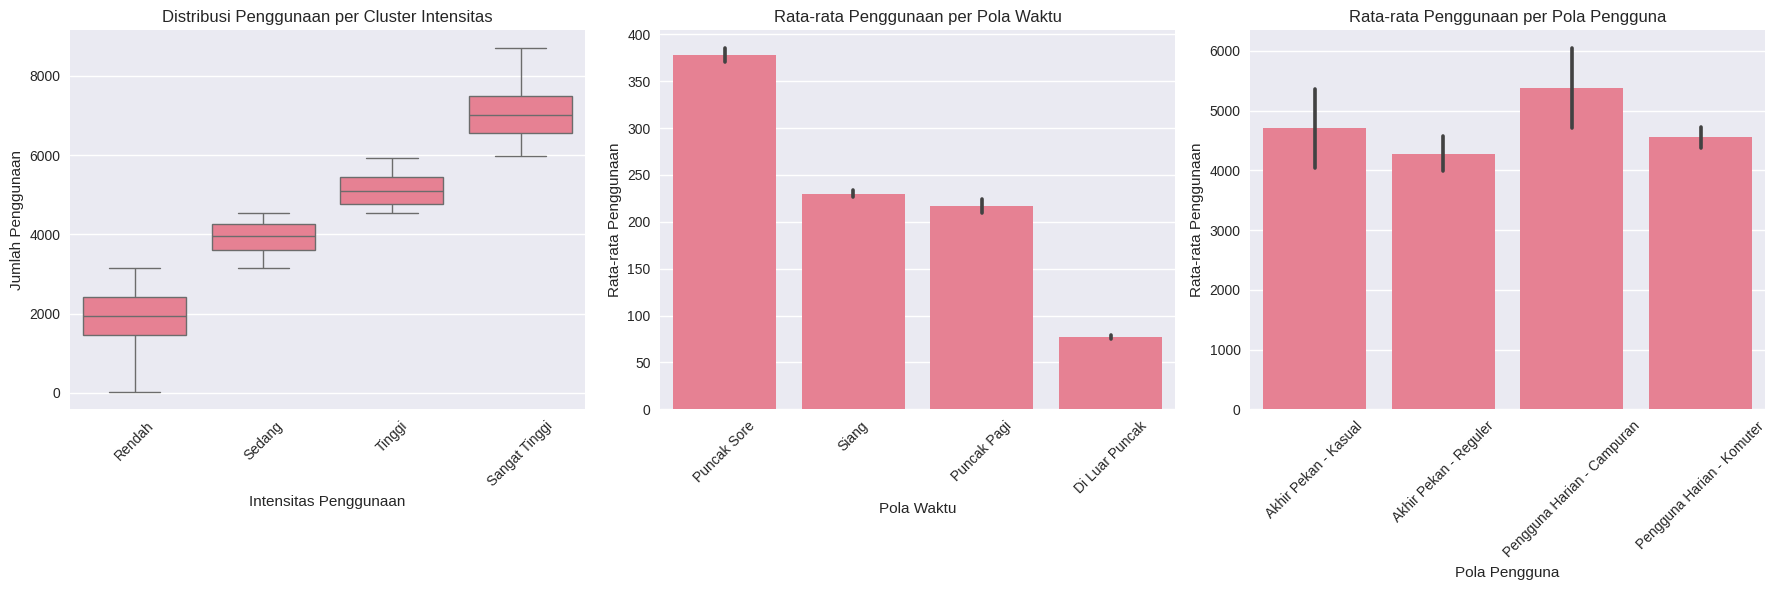


Distribusi Pola Pengguna:
pola_pengguna
Pengguna Harian - Komuter     479
Akhir Pekan - Reguler         203
Akhir Pekan - Kasual           28
Pengguna Harian - Campuran     21
Name: count, dtype: int64


In [61]:
# 1. Clustering berdasarkan intensitas penggunaan (binning)
day_df['intensitas_penggunaan'] = pd.qcut(day_df['cnt'], 
                                          q=4, 
                                          labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])
intensitas_stats = day_df.groupby('intensitas_penggunaan')['cnt'].agg(['count', 'mean', 'min', 'max'])
print("\nStatistik Cluster Intensitas Penggunaan:")
print(intensitas_stats)

# 2. Clustering berdasarkan pola waktu penggunaan (manual grouping)
def get_time_pattern(hour):
    if 6 <= hour <= 9:
        return 'Puncak Pagi'
    elif 10 <= hour <= 15:
        return 'Siang'
    elif 16 <= hour <= 19:
        return 'Puncak Sore'
    else:
        return 'Di Luar Puncak'

# Menambahkan kolom pola waktu pada data per jam
hour_df['pola_waktu'] = hour_df['hr'].apply(get_time_pattern)

# Menghitung rata-rata penggunaan per pola waktu dan mengurutkannya
pola_waktu_df = hour_df.groupby('pola_waktu')['cnt'].mean().reset_index()
pola_waktu_df = pola_waktu_df.sort_values(by='cnt', ascending=False)
print("\nRata-rata Penggunaan berdasarkan Pola Waktu:")
print(pola_waktu_df)

# 3. Clustering berdasarkan tipe pengguna dan waktu (manual grouping)
def get_user_pattern(row):
    rasio_kasual = row['casual'] / (row['casual'] + row['registered'] + 1e-9)  # Hindari pembagian dengan nol
    if row['workingday'] == 1:
        if rasio_kasual < 0.2:
            return 'Pengguna Harian - Komuter'
        else:
            return 'Pengguna Harian - Campuran'
    else:
        if rasio_kasual > 0.4:
            return 'Akhir Pekan - Kasual'
        else:
            return 'Akhir Pekan - Reguler'

# Menambahkan kolom pola pengguna pada data harian
day_df['pola_pengguna'] = day_df.apply(get_user_pattern, axis=1)
pola_pengguna_stats = day_df.groupby('pola_pengguna')['cnt'].agg(['count', 'mean'])
print("\nStatistik Cluster Pola Pengguna:")
print(pola_pengguna_stats)

# Visualisasi hasil clustering
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Distribusi Penggunaan per Cluster Intensitas
sns.boxplot(x='intensitas_penggunaan', y='cnt', data=day_df, ax=axes[0])
axes[0].set_title('Distribusi Penggunaan per Cluster Intensitas')
axes[0].set_xlabel('Intensitas Penggunaan')
axes[0].set_ylabel('Jumlah Penggunaan')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Rata-rata Penggunaan per Pola Waktu
sns.barplot(x='pola_waktu', y='cnt', data=hour_df, ax=axes[1], order=pola_waktu_df['pola_waktu'])
axes[1].set_title('Rata-rata Penggunaan per Pola Waktu')
axes[1].set_xlabel('Pola Waktu')
axes[1].set_ylabel('Rata-rata Penggunaan')
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Rata-rata Penggunaan per Pola Pengguna
sns.barplot(x='pola_pengguna', y='cnt', data=day_df, ax=axes[2], order=pola_pengguna_stats.index)
axes[2].set_title('Rata-rata Penggunaan per Pola Pengguna')
axes[2].set_xlabel('Pola Pengguna')
axes[2].set_ylabel('Rata-rata Penggunaan')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Memastikan distribusi data setelah clustering pengguna
distribusi_pengguna = day_df['pola_pengguna'].value_counts()
print("\nDistribusi Pola Pengguna:")
print(distribusi_pengguna)

# Insight dari Manual Clustering

## 1. Intensitas Penggunaan:
- Terdapat 4 kelompok penggunaan yang jelas: **Rendah**, **Sedang**, **Tinggi**, dan **Sangat Tinggi**.
- Perbedaan antara kelompok **Sangat Tinggi** dan **Rendah** sangat signifikan, dengan jumlah penggunaan pada cluster "Sangat Tinggi" jauh lebih besar dibandingkan dengan cluster lainnya.
- Kelompok **Rendah** memiliki distribusi penggunaan yang lebih bervariasi, sementara kelompok **Sangat Tinggi** cenderung lebih stabil meskipun volumenya tinggi.
- Hal ini menunjukkan bahwa ada sejumlah hari dengan aktivitas penggunaan yang sangat tinggi dibandingkan hari-hari lainnya.

## 2. Pola Waktu:
- Terdapat 4 pola waktu penggunaan: **Puncak Sore**, **Siang**, **Puncak Pagi**, dan **Di Luar Puncak**.
- **Puncak Sore** memiliki rata-rata penggunaan tertinggi, diikuti oleh **Siang** dan **Puncak Pagi**.
- Pola **Di Luar Puncak** memiliki penggunaan terendah secara signifikan dibandingkan pola lainnya.
- Pola ini mengindikasikan adanya aktivitas puncak pada sore hari, kemungkinan terkait dengan aktivitas pulang kerja atau sekolah.

## 3. Pola Pengguna:
- Terdapat 4 pola pengguna: **Akhir Pekan - Kasual**, **Akhir Pekan - Reguler**, **Pengguna Harian - Campuran**, dan **Pengguna Harian - Komuter**.
- **Pengguna Harian - Campuran** memiliki rata-rata penggunaan tertinggi, menunjukkan adanya pengguna kasual dan terdaftar yang aktif pada hari kerja.
- **Akhir Pekan - Kasual** memiliki penggunaan yang lebih rendah dibandingkan dengan **Pengguna Harian - Komuter**.
- Terdapat perbedaan signifikan antara pola penggunaan pada hari kerja dan akhir pekan, mengindikasikan bahwa penggunaan pada akhir pekan cenderung lebih bersifat rekreasi atau santai.


## Conclusion

Berdasarkan analisis yang telah dilakukan, dapat disimpulkan sebagai berikut:

1. **Pola Penggunaan Berdasarkan Waktu dan Cuaca:**
   - Terdapat dua puncak penggunaan sepeda harian: **pagi (8-9)** dan **sore (17-18)**, yang mengindikasikan aktivitas komuting.
   - **Musim Gugur (Fall)** memiliki rata-rata penggunaan tertinggi dibandingkan musim lainnya, menunjukkan bahwa kondisi cuaca pada musim tersebut cenderung mendukung aktivitas bersepeda.
   - Cuaca sangat mempengaruhi penggunaan sepeda, dengan penggunaan tertinggi terjadi pada **cuaca cerah**, sedangkan pada cuaca buruk jumlah pengguna menurun drastis.

2. **Perbandingan Pengguna Kasual dan Terdaftar (Casual dan Registered):**
   - **Pengguna terdaftar (Registered)** mendominasi sistem dengan rata-rata penggunaan hampir **4 kali lipat** dari pengguna kasual.
   - **Pengguna kasual** lebih aktif pada **hari libur (weekend)**, sedangkan pengguna terdaftar cenderung aktif pada **hari kerja (weekday)**.
   - Pola penggunaan kedua kelompok ini berbeda signifikan, menandakan adanya perbedaan motivasi atau tujuan penggunaan sepeda.

3. **Hasil Manual Clustering:**
   - Berhasil mengidentifikasi **4 tingkat intensitas penggunaan**: **Rendah**, **Sedang**, **Tinggi**, dan **Sangat Tinggi**. Terdapat perbedaan signifikan antara penggunaan intensitas tinggi dan rendah.
   - Pola waktu menunjukkan bahwa penggunaan tertinggi terjadi pada **jam komuting**, baik pada pagi maupun sore hari.
   - Pola pengguna menunjukkan perbedaan karakteristik yang jelas antara **pengguna weekday dan weekend**. Pengguna **weekday** didominasi oleh komuter terdaftar, sedangkan pengguna **weekend** cenderung lebih kasual.
   - Perbedaan pola penggunaan ini mengindikasikan bahwa layanan sepeda lebih banyak dimanfaatkan sebagai moda transportasi pada hari kerja dan sebagai rekreasi pada akhir pekan.
